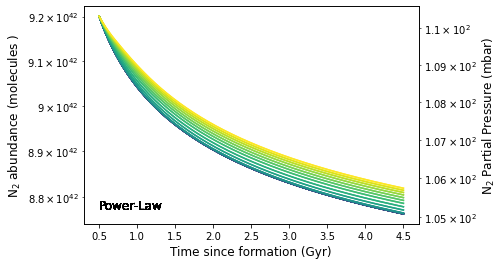

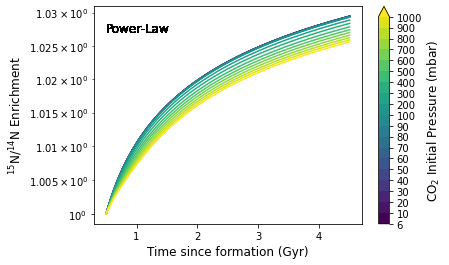

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

time_step = 1e-3
time_step_years = 1e9 * time_step
time = np.arange(0,4.5+time_step,time_step)

def N2_initial_function(N2_initial, pressure_initial):
    
    
    m_delta = 1
    z_delta = 80 #km
    grav = 3.721 #m s-2
    grav_for_FF = 0.00371
    k_amu = 0.00831 #km2 amu s-2 K-1
    surf_area = 1.4437e14  #m2
    temp = 200 #K
    avogadro = 6.022e23 #molecules/mol
    m_N2 = (28.014 / avogadro) / 1e3 #kg
    m_CO2 = (44.01 / avogadro) / 1e3 #kg
    FF = np.exp(-(m_delta * grav_for_FF * z_delta) / (k_amu * temp))
    FF_DR = 0.58
    FF_PD = 0.29
    mars_area = 1.4e18 #cm2
    
    ff_28_44 = 17.4
    ff_29_44 = 14.6
    
    CO2_current_pressure = 6 #mbar
    #CO2_current_molecules = 2.87e41 #molecules 
    CO2_initial_pressure = pressure_initial #mbar 
    
    CO2_initial_molecules = (pressure_initial * 100 * surf_area) / (m_CO2 * grav) 

    power = (np.log(CO2_initial_pressure / CO2_current_pressure)) / (np.log(time[700] / time[-1]))
    base = CO2_initial_pressure / (time[700])**power
    
    N15_percentage = 0.003663004     #Junk and Svec 1958 referencing Nier 1950 0.00354630893 
    N14_percentage = 0.996336996                                             #0.99645369106
    
    #N15_sec1 = []
    N15 = N2_initial * 2 * N15_percentage
    #N15_sec1.append(N15_sec1_prev)

    #N14_sec1 = []
    N14 = N2_initial * 2 * N14_percentage
    #N14_sec1.append(N14_sec1_prev)
    
    N15_14_Terrestrial = N15 / N14
    
    N29 = N15
    N28 = (N14 - N15)/2.
    
    CO2_1 = []
    CO2_prev_1 = CO2_initial_molecules
    CO2_1.append(CO2_prev_1) #at 4.4 gya
    
    N2_28_1 = []
    N2_28_prev_1 = N28
    N2_28_1.append(N2_28_prev_1)

    N2_29_1 = []
    N2_29_prev_1 = N29
    N2_29_1.append(N2_29_prev_1)

    N15_1 = []
    N15_prev_1 = N15
    N15_1.append(N15_prev_1)
    
    N14_1 = []
    N14_prev_1 = N14
    N14_1.append(N14_prev_1)
    
    f_prev_1 = N15_prev_1 / N14_prev_1

    N2_1 = []
    N2_prev_1 = N2_28_prev_1 + N2_29_prev_1 
    #print(N2_prev_6)
    N2_1.append(N2_prev_1)

    N2_mixing_ratio_prev_1 = N2_prev_1 / CO2_prev_1
    mixingratio_1 = []
    mixingratio_1.append(N2_mixing_ratio_prev_1)
        
    N15_mantle = 0.00354630893
    N14_mantle = 0.99645369106

    
    for a in reversed(time[3801:4001]): 
                
        I_rel1 = ((4.5 - a) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_1 < 0.026:
            
            N14_escape_flux_PD_s1 = ((3.8462e6 * N2_mixing_ratio_prev_1) - 3.8462e-1) * I_rel1
        
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s1 = ((7.6923e6 * N2_mixing_ratio_prev_1) - 7.6923e-1) * I_rel1
        
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_1 < 0.3:
            
            N14_escape_flux_PD_s1 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_1)) + 5.6346e5) * I_rel1
        
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s1 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_1)) + 1.1269e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_1 < 0.8:
            
            N14_escape_flux_PD_s1 = ((-2.5000e5 * (N2_mixing_ratio_prev_1)**2) + (4.3929e5 * N2_mixing_ratio_prev_1) + 3.0214e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_s1 = ((-5.000e5 * (N2_mixing_ratio_prev_1)**2) + (8.7857e5 * N2_mixing_ratio_prev_1) + 6.0429e5) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

        
        elif 0.8 <= N2_mixing_ratio_prev_1 < 1.:
            
            N14_escape_flux_PD_s1 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_1)) + 5.0490e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
           
            N14_escape_flux_s1 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0098e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years


        elif 1. <= N2_mixing_ratio_prev_1 < 2.:
            
            N14_escape_flux_PD_s1 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_1)) + 5.0500e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_s1 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0100e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

    
        elif 2. <= N2_mixing_ratio_prev_1 < 3.:
            
            N14_escape_flux_PD_s1 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_1)) + 5.1645e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s1 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0329e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        else:
            
            N14_escape_flux_PD_s1 = 5.3000e5 * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
        
            N14_escape_flux_s1 = 1.0600e6 * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        N15_escape_flux1_PD = ((N14_escape_flux1_PD)) * FF * FF_PD * f_prev_1 
        
        N15_escape_flux1 = ((N14_escape_flux1)) * FF * FF_DR * f_prev_1 
        
        N28_escape_flux1 = (N14_escape_flux1 - N15_escape_flux1)/2

        N28_escape_flux1_PD = (N14_escape_flux1_PD - N15_escape_flux1_PD)/2
        
        N2_28_current1 = N2_28_prev_1 - (N28_escape_flux1_PD) - (N28_escape_flux1)
                        
        CO2_current1 = CO2_initial_molecules
                
        N2_29_current1 = N2_29_prev_1 - N15_escape_flux1_PD - N15_escape_flux1
        
        N14_current1 = (N2_28_current1 * 2) + N2_29_current1
        N15_current1 = N2_29_current1

        N2_current1 = N2_28_current1 + N2_29_current1
        
        N2_mixing_ratio_current1 = N2_current1 / CO2_current1
        
        
        N2_prev_1 = N2_current1
        N2_28_prev_1 = N2_28_current1
        N2_29_prev_1 = N2_29_current1
        CO2_prev_1 = CO2_current1
        f_prev_1 = N15_current1 / N14_current1
        N2_mixing_ratio_prev_1 = N2_mixing_ratio_current1
        
        N2_28_1.append(N2_28_current1) 
        N2_29_1.append(N2_29_current1)
        N2_1.append(N2_prev_1)
        CO2_1.append(CO2_current1)
        mixingratio_1.append(N2_mixing_ratio_current1)        
        
            
    CO2_2 = []
    CO2_prev_2 = CO2_1[-1]
    
    N2_28_2 = []
    N2_28_prev_2 = N2_28_1[-1]

    N2_29_2 = []
    N2_29_prev_2 = N2_29_1[-1]

    f_prev_2 = N15_1[-1] / N14_1[-1]
    
    N2_2 = []
    N2_prev_2 = N2_1[-1]

    N2_mixing_ratio_prev_2 = N2_1[-1] / CO2_1[-1]
    mixingratio_2 = []

    
    for b in reversed(time[1:3801]): 
        
        I_rel2 = ((4.5 - b) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_2 < 0.026:
            
            N14_escape_flux_PD_s2 = ((3.8462e6 * N2_mixing_ratio_prev_2) - 3.8462e-1) * I_rel2
        
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s2 = ((7.6923e6 * N2_mixing_ratio_prev_2) - 7.6923e-1) * I_rel2
        
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_2 < 0.3:
            
            N14_escape_flux_PD_s2 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_2)) + 5.6346e5) * I_rel2
        
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s2 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_2)) + 1.1269e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_2 < 0.8:
            
            N14_escape_flux_PD_s2 = ((-2.5000e5 * (N2_mixing_ratio_prev_2)**2) + (4.3929e5 * N2_mixing_ratio_prev_2) + 3.0214e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_s2 = ((-5.000e5 * (N2_mixing_ratio_prev_2)**2) + (8.7857e5 * N2_mixing_ratio_prev_2) + 6.0429e5) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.8 <= N2_mixing_ratio_prev_2 < 1.:
            
            N14_escape_flux_PD_s2 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_2)) + 5.0490e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s2 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0098e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years


        elif 1. <= N2_mixing_ratio_prev_2 < 2.:
            
            N14_escape_flux_PD_s2 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_2)) + 5.0500e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_s2 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0100e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 2. <= N2_mixing_ratio_prev_2 < 3.:
            
            N14_escape_flux_PD_s2 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_2)) + 5.1645e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s2 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0329e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        else:
            
            N14_escape_flux_PD_s2 = 5.3000e5 * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
                  
            N14_escape_flux_s2 = 1.0600e6 * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

        
        N15_escape_flux2_PD = ((N14_escape_flux2_PD)) * FF * FF_PD * f_prev_2
        
        N15_escape_flux2 = ((N14_escape_flux2)) * FF * FF_DR * f_prev_2 
        
        N28_escape_flux2 = (N14_escape_flux2 - N15_escape_flux2)/2
        
        N28_escape_flux2_PD = (N14_escape_flux2_PD - N15_escape_flux2_PD)/2

        N2_28_current2 = N2_28_prev_2 - (N28_escape_flux2_PD) - (N28_escape_flux2)
                        
        CO2_mbar2 = base * (4.5 - b)**power
        CO2_current2 = (CO2_mbar2 * 100 * surf_area) / (m_CO2 * grav)  #km-3 #CO2_current = (CO2_mbar * 100 * surface_area) / (molecular_mass_CO2 * grav_acceleration)
        
                
        N2_29_current2 = N2_29_prev_2 - N15_escape_flux2_PD - N15_escape_flux2
        
        N14_current2 = (N2_28_current2 * 2) + N2_29_current2
        N15_current2 = N2_29_current2

        N2_current2 = N2_28_current2 + N2_29_current2
        
        N2_mixing_ratio_current2 = N2_current2 / CO2_current2
        
        
        N2_prev_2 = N2_current2
        N2_28_prev_2 = N2_28_current2
        N2_29_prev_2 = N2_29_current2
        CO2_prev_2 = CO2_current2
        f_prev_2 = N15_current2 / N14_current2
        N2_mixing_ratio_prev_2 = N2_mixing_ratio_current2
        
        N2_28_2.append(N2_28_current2) 
        N2_29_2.append(N2_29_current2)
        N2_2.append(N2_prev_2)
        CO2_2.append(CO2_current2)
        mixingratio_2.append(N2_mixing_ratio_current2)        

    
    N2_28_all = N2_28_1 + N2_28_2 
    N2_29_all = N2_29_1 + N2_29_2 
    N2_all = N2_1 + N2_2 
        
    N14_all = np.add([b * 2 for b in N2_28_all], N2_29_all)
    N15_all = N2_29_all
    N14_15 = np.divide(N14_all, N15_all)
    N15_14 = np.divide(N15_all, N14_all)
    N15_14_Enrichment = [l / N15_14_Terrestrial for l in N15_14]
          
    return(N2_all, N15_14, N15_14_Enrichment)

today_N15_14 = 1/170
today_enrichment = today_N15_14 / 0.0035589299952590208
#print(today_enrichment)

surf_area = 1.4437e14 #m2
avogadro = 6.022e23 #molecules/mol
m_N2 = (28.014 / avogadro) / 1e3 #kg #amu  
m_CO2 = (44.01 / avogadro) / 1e3 #kg #amu
grav_acc = 3.721 #m/s2

N2_plot = []
N2_plot_pressure = []
N15_14_plot = [] 
N15_14_En_plot = []
#CO2_plot = []

pressure_list = [6,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000] #np.arange(100, 1100, 100) #[6,10,20,30,40,50,60,70,80,90,100] # # ## # # # #

for pressure in pressure_list:
    Returns = N2_initial_function(9.2007e42, pressure) 
    N2_plot.append(Returns[0])
    N15_14_plot.append(Returns[1])
    N15_14_En_plot.append(Returns[2])
    #CO2_plot.append(Returns[3])

N2_plot_array = np.array(N2_plot)

for b in N2_plot_array:
    N2_pressure = ((b * m_N2 * grav_acc) / surf_area) * 0.01
    N2_plot_pressure.append(N2_pressure)

cmap = plt.get_cmap('viridis')#, len(pressure))
colors = cmap(np.linspace(0, 1, len(pressure_list)))
cmap, norm = mcolors.from_levels_and_colors(pressure_list, colors, extend='max')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


plt.figure(0)
for i, j in enumerate(N2_plot):
    plt.plot(time[500:4501], j, c=cmap(i))
    plt.yscale('log')
    #plt.ylim((3.370e43, 3.375e43))
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('N$_2$ abundance (molecules )', fontsize=12)
    plt.text(0.5,8.775e42,'Power-Law',size=12) 
    
plt.twinx()
for k, l in enumerate(N2_plot_pressure):
    #c = next(color)
    plt.plot(time[500:4501], l, c=cmap(k)) 
    plt.yscale('log')
    plt.ylabel('N$_2$ Partial Pressure (mbar)', fontsize=12)

plt.savefig('PP_for_paperA.png', dpi=300, bbox_inches='tight')

plt.figure(1)
for i, l in enumerate(N15_14_En_plot):
    plt.plot(time[500:4501], l, c=cmap(i))
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('$^{15}$N/$^{14}$N Enrichment', fontsize=12)
    plt.yscale('log')
    plt.text(0.5,1.027,'Power-Law',size=12)
    
plt.colorbar(sm, ticks=pressure_list).set_label(label="CO$_2$ Initial Pressure (mbar)", size=12)    
plt.savefig('PP_for_paperE.png', dpi=300, bbox_inches='tight')


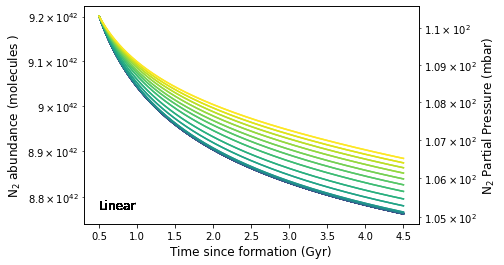

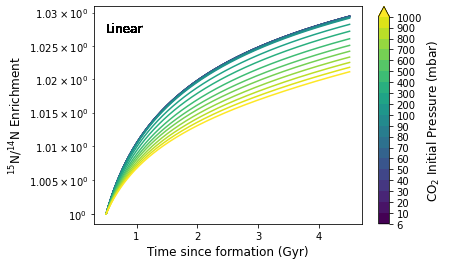

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

time_step = 1e-3
time_step_years = 1e9 * time_step
time = np.arange(0,4.5+time_step,time_step)

def N2_initial_function(N2_initial, pressure_initial):
    
    
    m_delta = 1
    z_delta = 80 #km
    grav = 3.721 #m s-2
    grav_for_FF = 0.00371
    k_amu = 0.00831 #km2 amu s-2 K-1
    surf_area = 1.4437e14  #m2
    temp = 200 #K
    avogadro = 6.022e23 #molecules/mol
    m_N2 = (28.014 / avogadro) / 1e3 #kg
    m_CO2 = (44.01 / avogadro) / 1e3 #kg
    FF = np.exp(-(m_delta * grav_for_FF * z_delta) / (k_amu * temp))
    FF_DR = 0.58
    FF_PD = 0.29
    mars_area = 1.4e18 #cm2
    
    ff_28_44 = 17.4
    ff_29_44 = 14.6
    
    CO2_current_pressure = 6 #mbar
    #CO2_current_molecules = 2.87e41 #molecules 
    CO2_initial_pressure = pressure_initial #mbar 
    
    CO2_initial_molecules = (pressure_initial * 100 * surf_area) / (m_CO2 * grav) 

    slope = (CO2_initial_pressure - CO2_current_pressure) / (time[700] - time[-1])
    intercept = CO2_current_pressure - (slope * time[-1])
    
    N15_percentage = 0.003663004     #Junk and Svec 1958 referencing Nier 1950 0.00354630893 
    N14_percentage = 0.996336996                                             #0.99645369106
    
    #N15_sec1 = []
    N15 = N2_initial * 2 * N15_percentage
    #N15_sec1.append(N15_sec1_prev)

    #N14_sec1 = []
    N14 = N2_initial * 2 * N14_percentage
    #N14_sec1.append(N14_sec1_prev)
    
    N15_14_Terrestrial = N15 / N14
    
    N29 = N15
    N28 = (N14 - N15)/2.
    
    CO2_1 = []
    CO2_prev_1 = CO2_initial_molecules
    CO2_1.append(CO2_prev_1) #at 4.4 gya
    
    N2_28_1 = []
    N2_28_prev_1 = N28
    N2_28_1.append(N2_28_prev_1)

    N2_29_1 = []
    N2_29_prev_1 = N29
    N2_29_1.append(N2_29_prev_1)

    N15_1 = []
    N15_prev_1 = N15
    N15_1.append(N15_prev_1)
    
    N14_1 = []
    N14_prev_1 = N14
    N14_1.append(N14_prev_1)
    
    f_prev_1 = N15_prev_1 / N14_prev_1

    N2_1 = []
    N2_prev_1 = N2_28_prev_1 + N2_29_prev_1 
    #print(N2_prev_6)
    N2_1.append(N2_prev_1)

    N2_mixing_ratio_prev_1 = N2_prev_1 / CO2_prev_1
    mixingratio_1 = []
    mixingratio_1.append(N2_mixing_ratio_prev_1)
        
    N15_mantle = 0.00354630893
    N14_mantle = 0.99645369106

    
    for a in reversed(time[3801:4001]): 
                
        I_rel1 = ((4.5 - a) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_1 < 0.026:
            
            N14_escape_flux_PD_s1 = ((3.8462e6 * N2_mixing_ratio_prev_1) - 3.8462e-1) * I_rel1
        
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s1 = ((7.6923e6 * N2_mixing_ratio_prev_1) - 7.6923e-1) * I_rel1
        
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_1 < 0.3:
            
            N14_escape_flux_PD_s1 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_1)) + 5.6346e5) * I_rel1
        
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s1 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_1)) + 1.1269e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_1 < 0.8:
            
            N14_escape_flux_PD_s1 = ((-2.5000e5 * (N2_mixing_ratio_prev_1)**2) + (4.3929e5 * N2_mixing_ratio_prev_1) + 3.0214e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_s1 = ((-5.000e5 * (N2_mixing_ratio_prev_1)**2) + (8.7857e5 * N2_mixing_ratio_prev_1) + 6.0429e5) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

        
        elif 0.8 <= N2_mixing_ratio_prev_1 < 1.:
            
            N14_escape_flux_PD_s1 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_1)) + 5.0490e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
           
            N14_escape_flux_s1 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0098e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years


        elif 1. <= N2_mixing_ratio_prev_1 < 2.:
            
            N14_escape_flux_PD_s1 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_1)) + 5.0500e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_s1 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0100e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

    
        elif 2. <= N2_mixing_ratio_prev_1 < 3.:
            
            N14_escape_flux_PD_s1 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_1)) + 5.1645e5) * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s1 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_1)) + 1.0329e6) * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

            
        else:
            
            N14_escape_flux_PD_s1 = 5.3000e5 * I_rel1
            
            N14_escape_flux1_PD = N14_escape_flux_PD_s1 * mars_area * 3600 * 24 * 365 * time_step_years
        
            N14_escape_flux_s1 = 1.0600e6 * I_rel1
            
            N14_escape_flux1 = N14_escape_flux_s1 * mars_area * 3600 * 24 * 365 * time_step_years

        
        N15_escape_flux1_PD = ((N14_escape_flux1_PD)) * FF * FF_PD * f_prev_1 
        
        N15_escape_flux1 = ((N14_escape_flux1)) * FF * FF_DR * f_prev_1 
        
        N28_escape_flux1 = (N14_escape_flux1 - N15_escape_flux1)/2

        N28_escape_flux1_PD = (N14_escape_flux1_PD - N15_escape_flux1_PD)/2
            
        N2_28_current1 = N2_28_prev_1 - (N28_escape_flux1_PD) - (N28_escape_flux1)
                        
        CO2_current1 = CO2_initial_molecules
                
        N2_29_current1 = N2_29_prev_1 - N15_escape_flux1_PD - N15_escape_flux1
        
        N14_current1 = (N2_28_current1 * 2) + N2_29_current1
        N15_current1 = N2_29_current1

        N2_current1 = N2_28_current1 + N2_29_current1
        
        N2_mixing_ratio_current1 = N2_current1 / CO2_current1
        
        
        N2_prev_1 = N2_current1
        N2_28_prev_1 = N2_28_current1
        N2_29_prev_1 = N2_29_current1
        CO2_prev_1 = CO2_current1
        f_prev_1 = N15_current1 / N14_current1
        N2_mixing_ratio_prev_1 = N2_mixing_ratio_current1
        
        N2_28_1.append(N2_28_current1) 
        N2_29_1.append(N2_29_current1)
        N2_1.append(N2_prev_1)
        CO2_1.append(CO2_current1)
        mixingratio_1.append(N2_mixing_ratio_current1)        
        
            
    CO2_2 = []
    CO2_prev_2 = CO2_1[-1]
    
    N2_28_2 = []
    N2_28_prev_2 = N2_28_1[-1]

    N2_29_2 = []
    N2_29_prev_2 = N2_29_1[-1]

    f_prev_2 = N15_1[-1] / N14_1[-1]
    
    N2_2 = []
    N2_prev_2 = N2_1[-1]

    N2_mixing_ratio_prev_2 = N2_1[-1] / CO2_1[-1]
    mixingratio_2 = []

    
    for b in reversed(time[1:3801]): 
        
        I_rel2 = ((4.5 - b) / 4.5)**(-1.2)
         
        if 0 <= N2_mixing_ratio_prev_2 < 0.026:
            
            N14_escape_flux_PD_s2 = ((3.8462e6 * N2_mixing_ratio_prev_2) - 3.8462e-1) * I_rel2
        
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s2 = ((7.6923e6 * N2_mixing_ratio_prev_2) - 7.6923e-1) * I_rel2
        
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.026 <= N2_mixing_ratio_prev_2 < 0.3:
            
            N14_escape_flux_PD_s2 = ((1.2764e5 * np.log(N2_mixing_ratio_prev_2)) + 5.6346e5) * I_rel2
        
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s2 = ((2.5529e5 * np.log(N2_mixing_ratio_prev_2)) + 1.1269e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.3 <= N2_mixing_ratio_prev_2 < 0.8:
            
            N14_escape_flux_PD_s2 = ((-2.5000e5 * (N2_mixing_ratio_prev_2)**2) + (4.3929e5 * N2_mixing_ratio_prev_2) + 3.0214e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            N14_escape_flux_s2 = ((-5.000e5 * (N2_mixing_ratio_prev_2)**2) + (8.7857e5 * N2_mixing_ratio_prev_2) + 6.0429e5) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 0.8 <= N2_mixing_ratio_prev_2 < 1.:
            
            N14_escape_flux_PD_s2 = ((4.4768e4 * np.log(N2_mixing_ratio_prev_2)) + 5.0490e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s2 = ((8.9536e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0098e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years


        elif 1. <= N2_mixing_ratio_prev_2 < 2.:
            
            N14_escape_flux_PD_s2 = ((2.8854e4 * np.log(N2_mixing_ratio_prev_2)) + 5.0500e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
    
            N14_escape_flux_s2 = ((5.7708e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0100e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        elif 2. <= N2_mixing_ratio_prev_2 < 3.:
            
            N14_escape_flux_PD_s2 = ((1.2332e4 * np.log(N2_mixing_ratio_prev_2)) + 5.1645e5) * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
            
            N14_escape_flux_s2 = ((2.4663e4 * np.log(N2_mixing_ratio_prev_2)) + 1.0329e6) * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

            
        else:
            
            N14_escape_flux_PD_s2 = 5.3000e5 * I_rel2
            
            N14_escape_flux2_PD = N14_escape_flux_PD_s2 * mars_area * 3600 * 24 * 365 * time_step_years
                  
            N14_escape_flux_s2 = 1.0600e6 * I_rel2
            
            N14_escape_flux2 = N14_escape_flux_s2 * mars_area * 3600 * 24 * 365 * time_step_years

        
        N15_escape_flux2_PD = ((N14_escape_flux2_PD)) * FF * FF_PD * f_prev_2
        
        N15_escape_flux2 = ((N14_escape_flux2)) * FF * FF_DR * f_prev_2 
        
        N28_escape_flux2 = (N14_escape_flux2 - N15_escape_flux2)/2
        
        N28_escape_flux2_PD = (N14_escape_flux2_PD - N15_escape_flux2_PD)/2

        N2_28_current2 = N2_28_prev_2 - (N28_escape_flux2_PD) - (N28_escape_flux2)
                        
        CO2_mbar2 = (slope * (4.5 - b)) + intercept
        CO2_current2 = (CO2_mbar2 * 100 * surf_area) / (m_CO2 * grav)  #km-3 #CO2_current = (CO2_mbar * 100 * surface_area) / (molecular_mass_CO2 * grav_acceleration)
                
        N2_29_current2 = N2_29_prev_2 - N15_escape_flux2_PD - N15_escape_flux2
        
        N14_current2 = (N2_28_current2 * 2) + N2_29_current2
        N15_current2 = N2_29_current2

        N2_current2 = N2_28_current2 + N2_29_current2
        
        N2_mixing_ratio_current2 = N2_current2 / CO2_current2
        
        
        N2_prev_2 = N2_current2
        N2_28_prev_2 = N2_28_current2
        N2_29_prev_2 = N2_29_current2
        CO2_prev_2 = CO2_current2
        f_prev_2 = N15_current2 / N14_current2
        N2_mixing_ratio_prev_2 = N2_mixing_ratio_current2
        
        N2_28_2.append(N2_28_current2) 
        N2_29_2.append(N2_29_current2)
        N2_2.append(N2_prev_2)
        CO2_2.append(CO2_current2)
        mixingratio_2.append(N2_mixing_ratio_current2)        

    
    N2_28_all = N2_28_1 + N2_28_2 
    N2_29_all = N2_29_1 + N2_29_2 
    N2_all = N2_1 + N2_2 
    #CO2_all = CO2_1 + CO2_2 + CO2_3 + CO2_4 + CO2_5 + CO2_6 + CO2_7 + CO2_8 + CO2_9
    #print('{} mbar'.format(i))    
    
    N14_all = np.add([b * 2 for b in N2_28_all], N2_29_all)
    N15_all = N2_29_all
    N14_15 = np.divide(N14_all, N15_all)
    N15_14 = np.divide(N15_all, N14_all)
    N15_14_Enrichment = [l / N15_14_Terrestrial for l in N15_14]
          
    return(N2_all, N15_14, N15_14_Enrichment)

today_N15_14 = 1/170
today_enrichment = today_N15_14 / 0.0035589299952590208
#print(today_enrichment)

surf_area = 1.4437e14 #m2
avogadro = 6.022e23 #molecules/mol
m_N2 = (28.014 / avogadro) / 1e3 #kg #amu  
m_CO2 = (44.01 / avogadro) / 1e3 #kg #amu
grav_acc = 3.721 #m/s2

N2_plot = []
N2_plot_pressure = []
N15_14_plot = [] 
N15_14_En_plot = []
#CO2_plot = []

pressure_list = [6,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000] #np.arange(100, 1100, 100) #[6,10,20,30,40,50,60,70,80,90,100] # # ## # # # #

for pressure in pressure_list:
    Returns = N2_initial_function(9.2007e42, pressure) 
    N2_plot.append(Returns[0])
    N15_14_plot.append(Returns[1])
    N15_14_En_plot.append(Returns[2])
    #CO2_plot.append(Returns[3])

N2_plot_array = np.array(N2_plot)

for b in N2_plot_array:
    N2_pressure = ((b * m_N2 * grav_acc) / surf_area) * 0.01
    N2_plot_pressure.append(N2_pressure)

cmap = plt.get_cmap('viridis')#, len(pressure))
colors = cmap(np.linspace(0, 1, len(pressure_list)))
cmap, norm = mcolors.from_levels_and_colors(pressure_list, colors, extend='max')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


plt.figure(0)
for i, j in enumerate(N2_plot):
    plt.plot(time[500:4501], j, c=cmap(i))
    plt.yscale('log')
    #plt.ylim((3.370e43, 3.375e43))
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('N$_2$ abundance (molecules )', fontsize=12)
        #plt.title('Sputtering and DR with Linear $CO_2$ Decay', fontsize = 10)
        #plt.legend(pressure, title = '$CO_2$ Initial Pressure (mbar)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.text(0.5,8.775e42,'Linear',size=12) 
    
plt.twinx()
for k, l in enumerate(N2_plot_pressure):
    #c = next(color)
    plt.plot(time[500:4501], l, c=cmap(k)) 
    plt.yscale('log')
    plt.ylabel('N$_2$ Partial Pressure (mbar)', fontsize=12)

plt.savefig('PP_for_paper_LIN_A.png', dpi=300, bbox_inches='tight')

plt.figure(1)
for i, l in enumerate(N15_14_En_plot):
    plt.plot(time[500:4501], l, c=cmap(i))
    #plt.axhline(y = today_enrichment + 0.14583034808, color = '#e7761e', ls ='--')
    #plt.axhline(y = today_enrichment - 0.14583034808, color = '#e7761e', ls ='--')
    plt.xlabel('Time since formation (Gyr)', fontsize=12)
    plt.ylabel('$^{15}$N/$^{14}$N Enrichment', fontsize=12)
    plt.yscale('log')
    plt.text(0.5,1.027,'Linear',size=12)
    
plt.colorbar(sm, ticks=pressure_list).set_label(label="CO$_2$ Initial Pressure (mbar)", size=12)   
plt.savefig('PP_for_paper_LIN_E.png', dpi=300, bbox_inches='tight')
